In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('Breastcancerprocessed.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'perimeter__mean'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               568 non-null    int64  
 1   id                       568 non-null    int64  
 2   diagnosis                568 non-null    object 
 3   radius_mean              568 non-null    float64
 4   texture_mean             568 non-null    float64
 5   perimeter_mean           568 non-null    float64
 6   area_mean                568 non-null    float64
 7   smoothness_mean          568 non-null    float64
 8   compactness_mean         568 non-null    float64
 9   concavity_mean           568 non-null    float64
 10  concave points_mean      568 non-null    float64
 11  symmetry_mean            568 non-null    float64
 12  fractal_dimension_mean   568 non-null    float64
 13  radius_se                568 non-null    float64
 14  texture_se               5

In [7]:
df.isnull().sum()

Unnamed: 0                 0
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
perimeter__mean            0
dtype: int64

In [9]:
df.shape

(568, 34)

In [10]:
X=df[['texture_mean','radius_mean']]
y=df['diagnosis']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state = 42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[97 13]
 [17 44]]


0.8245614035087719

In [17]:
df.head(2)

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,perimeter__mean
0,0,842302,M,17.99,10.38,10.38,1001.0,0.11840,0.27760,0.3001,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,10.38
1,1,842517,M,20.57,17.77,17.77,1326.0,0.08474,0.07864,0.0869,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,17.77


In [117]:
classifier.predict([[7.99,20.38]])[0]

'M'

<Axes: >

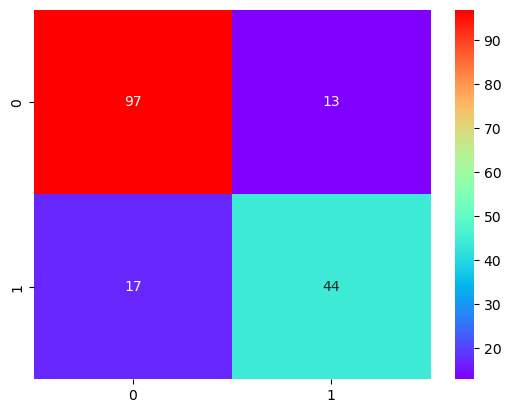

In [18]:
sns.heatmap(cm,annot=True,cmap='rainbow')